# K-Means Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_csv("clustering.csv")
df

,X1,X2
0,-4.581081,-8.286462
1,-0.753894,1.864580
2,9.019485,0.356573
3,-3.293414,6.087256
4,7.042307,1.157019
...,...,...
495,-4.080916,-5.030842
496,-2.663401,9.696590
497,3.968309,5.311213
498,-7.925073,-4.782091


In [3]:
df.isnull().sum()

X1    0
X2    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      500 non-null    float64
 1   X2      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [9]:
df.describe()

,X1,X2
count,500.000000,500.000000
mean,-1.560198,1.453822
std,5.077718,6.713320
min,-11.043486,-11.727868
25%,-5.728146,-5.127837
50%,-2.371867,1.758263
75%,3.220747,7.714326
max,10.797640,16.719749


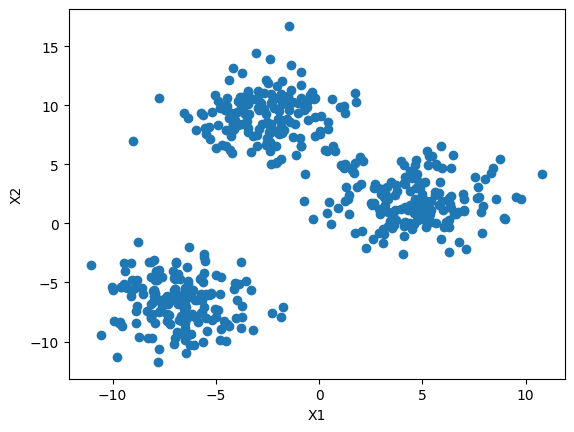

In [5]:
plt.scatter(df["X1"],df["X2"])
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [6]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
kmean.fit(df)

/gs_datasci/GlobalFunctions/Nathan_Global_Functions/.venv/lib64/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [7]:
kmean.cluster_centers_

array([[-2.56005145,  9.07257054],
       [-6.78277285, -6.63304128],
       [ 4.58815239,  1.91636363]])

In [8]:
kmean.labels_

array([1, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 1, 1, 0, 2, 0,
       2, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 1,
       2, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 2, 1, 2, 2,
       0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 2, 2, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 2, 0, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2,
       2, 0, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2,
       0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0,
       2, 1, 2, 2, 1, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2,

In [9]:
len(kmean.labels_)

500

In [14]:
df.shape

(500, 2)

In [10]:
df["Cluster"] = kmean.labels_

In [11]:
df.head()

,X1,X2,Cluster
0,-4.581081,-8.286462,1
1,-0.753894,1.864580,2
2,9.019485,0.356573,2
3,-3.293414,6.087256,0
4,7.042307,1.157019,2


In [12]:
df[df["Cluster"] == 0]

,X1,X2,Cluster
3,-3.293414,6.087256,0
11,-0.192006,7.372921,0
13,-1.367417,11.285417,0
16,-2.653218,11.021352,0
19,-4.721868,6.621873,0
...,...,...,...
481,-3.436033,8.082827,0
484,-1.821961,5.488206,0
491,-4.325246,6.189679,0
494,-2.380638,6.858797,0


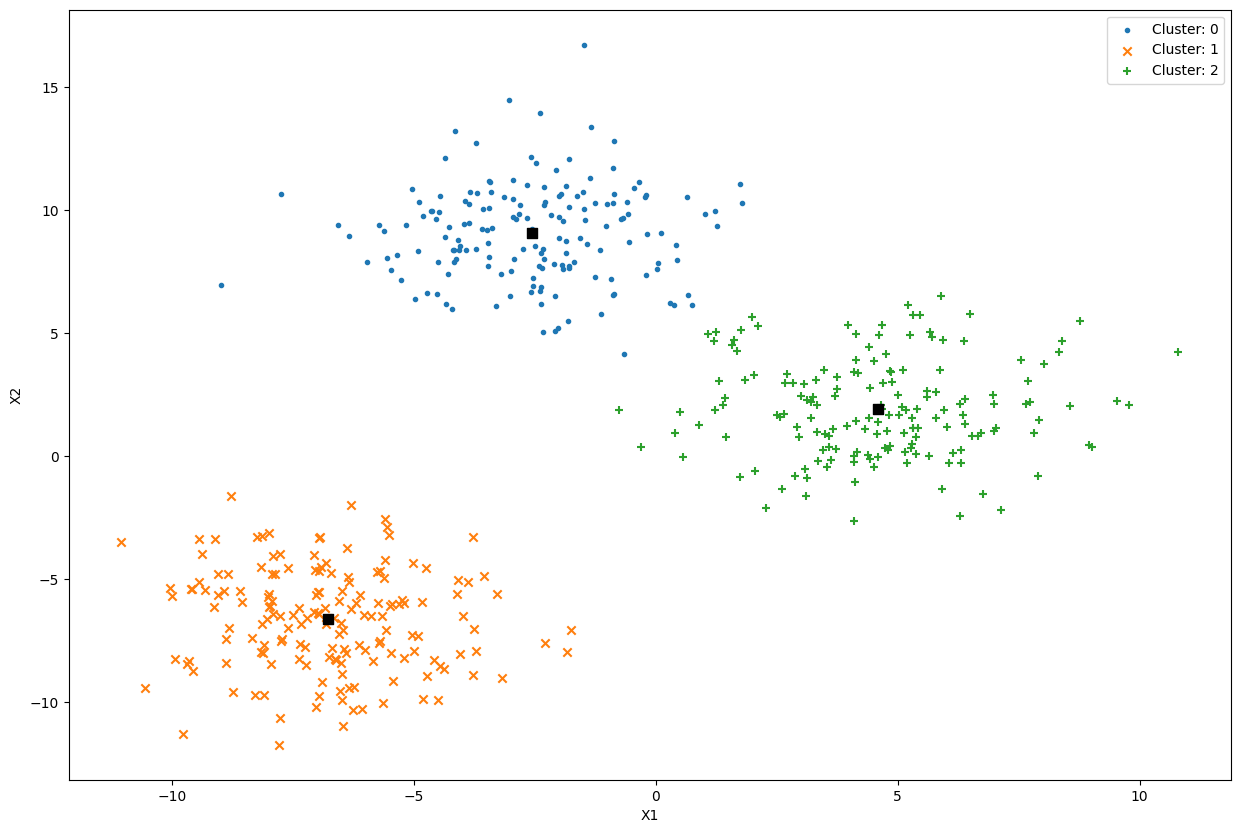

In [13]:
plt.figure(figsize=(15,10))
markers = [".",'x',"+"]

for i in range(0,3):
  cond = df["Cluster"] == i
  df2 = df[cond]
  plt.scatter(df2["X1"],df2["X2"], label = f"Cluster: {i}", marker=markers[i])

plt.scatter(kmean.cluster_centers_[:,0] , kmean.cluster_centers_[:,1] , color = "black" , s=60, marker = "s")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

In [14]:
kmean.inertia_

3783.2441794749593

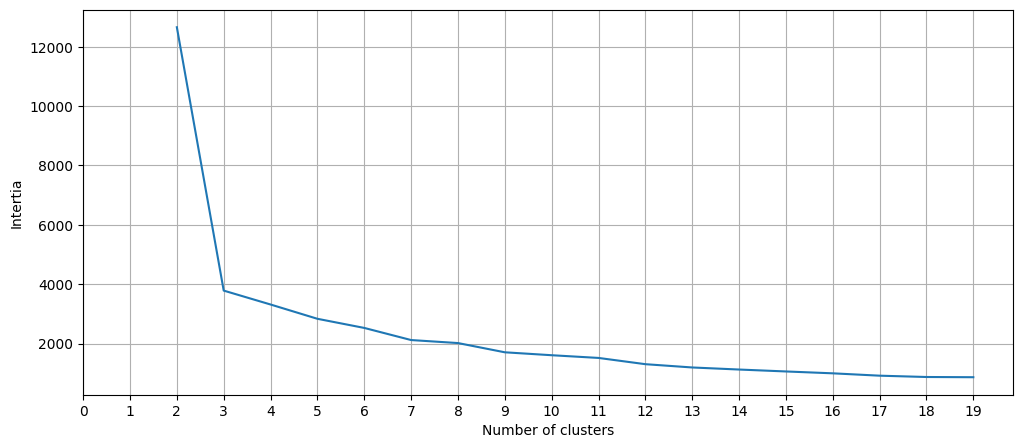

In [16]:
intertia = []
for k in range(2,20):
  kmean = KMeans(random_state=6, n_clusters=k, n_init= 'auto')
  kmean.fit(df)
  intertia.append(kmean.inertia_)
plt.figure(figsize=(12,5))
plt.grid()
plt.plot(range(2,20), intertia)
plt.xticks(range(0,20))
plt.xlabel("Number of clusters")
plt.ylabel("Intertia")
plt.show()